Samuel Alxander Perdomo Fajardo - 20222208795
Santiago Garcia Cuevas - 20221205107

In [2]:
import pandas as pd

df = pd.read_csv('Reporte_Delito_Violencia_Intrafamiliar_Polic_a_Nacional.csv', low_memory=False)

#Primera 5 columnas
print(df.head())

   DEPARTAMENTO          MUNICIPIO CODIGO DANE                 ARMAS MEDIOS  \
0     ATLÁNTICO  BARRANQUILLA (CT)     8001000  ARMA BLANCA / CORTOPUNZANTE   
1        BOYACÁ            DUITAMA    15238000  ARMA BLANCA / CORTOPUNZANTE   
2       CAQUETÁ        PUERTO RICO    18592000  ARMA BLANCA / CORTOPUNZANTE   
3      CASANARE               MANÍ    85139000  ARMA BLANCA / CORTOPUNZANTE   
4  CUNDINAMARCA   BOGOTÁ D.C. (CT)    11001000  ARMA BLANCA / CORTOPUNZANTE   

  FECHA HECHO     GENERO GRUPO ETARIO  CANTIDAD  
0   1/01/2010  MASCULINO      ADULTOS         1  
1   1/01/2010   FEMENINO      ADULTOS         1  
2   1/01/2010  MASCULINO      ADULTOS         1  
3   1/01/2010   FEMENINO      ADULTOS         1  
4   1/01/2010   FEMENINO      ADULTOS         1  


Limpio las columnas. Datos incoherentes o espacion vacio los elimino 

In [3]:
df_cleaned = df.dropna()

Columnas. Imprimo las columnas de mi DataFrame

In [39]:
print(df.columns)

Index(['DEPARTAMENTO', 'MUNICIPIO', 'CODIGO DANE', 'ARMAS MEDIOS',
       'FECHA HECHO', 'GENERO', 'GRUPO ETARIO', 'CANTIDAD'],
      dtype='object')


Resumen Estadistico General 

In [40]:
df_cleaned.describe()

,CANTIDAD
count,475353.000000
mean,1.708255
std,3.342139
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,130.000000


Frecuencia de Valores Categóricos

In [41]:
#Cantidad de crimenes por departamento 
df_cleaned['DEPARTAMENTO'].value_counts()


DEPARTAMENTO
CUNDINAMARCA          87376
ANTIOQUIA             57181
VALLE                 44740
SANTANDER             38416
BOYACÁ                26913
ATLÁNTICO             17449
TOLIMA                16935
HUILA                 16540
META                  16186
BOLÍVAR               15889
NORTE DE SANTANDER    14883
NARIÑO                14344
RISARALDA             14304
CAUCA                 13930
CÓRDOBA               10800
SUCRE                  9714
MAGDALENA              9679
CALDAS                 8707
CESAR                  7087
CASANARE               6417
CAQUETÁ                4852
QUINDÍO                4800
GUAJIRA                4431
ARAUCA                 3847
PUTUMAYO               3096
CHOCÓ                  2071
AMAZONAS               1407
SAN ANDRÉS             1153
GUAVIARE                886
GUAINÍA                 518
VICHADA                 424
VAUPÉS                  372
NO REPORTA                6
Name: count, dtype: int64

In [42]:
#Cantidad de crimenes por Genero 

df_cleaned['GENERO'].value_counts()

GENERO
FEMENINO      365903
MASCULINO     109156
NO REPORTA       294
Name: count, dtype: int64

In [43]:
#Cantidad de crimenes por grupo etario 

df_cleaned['GRUPO ETARIO'].value_counts()

GRUPO ETARIO
ADULTOS         420235
ADOLESCENTES     28396
MENORES          26448
NO REPORTA         274
Name: count, dtype: int64

Media Geometrica

In [7]:
from scipy.stats import gmean

mediaGeo_Cantidad = gmean(df_cleaned['CANTIDAD'])

print("La media Geometrica respecto a la cantidad: ", mediaGeo_Cantidad)

La media Geometrica respecto a la cantidad:  1.2677163520330579


In [19]:
departament_MediaGeometrica = df.groupby('DEPARTAMENTO')['CANTIDAD'].apply(gmean)

ANALISIS DE FECHA

In [44]:
df['FECHA HECHO'] = pd.to_datetime(df['FECHA HECHO'], dayfirst=True, errors='coerce')

In [45]:
#Este verifica que cantiftidad de fechas no se puedieron convertir 
#df_cleaned['FECHA HECHO'].isna().sum()

Conteo por Año 

In [53]:
df['AÑO'] = df['FECHA HECHO'].dt.year
df['AÑO'].value_counts()

AÑO
2020.0    102616
2019.0     52924
2017.0     50620
2016.0     50055
2018.0     48098
2015.0     45181
2014.0     30045
2021.0     22416
2013.0     21982
2012.0     20602
2011.0     17163
2010.0     15260
Name: count, dtype: int64

Conteo por Mes

In [47]:
df['MES'] = df['FECHA HECHO'].dt.month
df['MES'].value_counts()

MES
2.0     45917
1.0     45815
3.0     45328
5.0     45219
4.0     41210
9.0     38616
8.0     38216
7.0     37365
10.0    37148
6.0     36781
11.0    34347
12.0    31000
Name: count, dtype: int64

ANALISIS DE CANTIDAD 

In [17]:
import matplotlib.pyplot as plt
departament_counts = df.groupby('DEPARTAMENTO')['CANTIDAD'].sum()

Histograma de Cantidad de Delitos en funcion de los departamentos

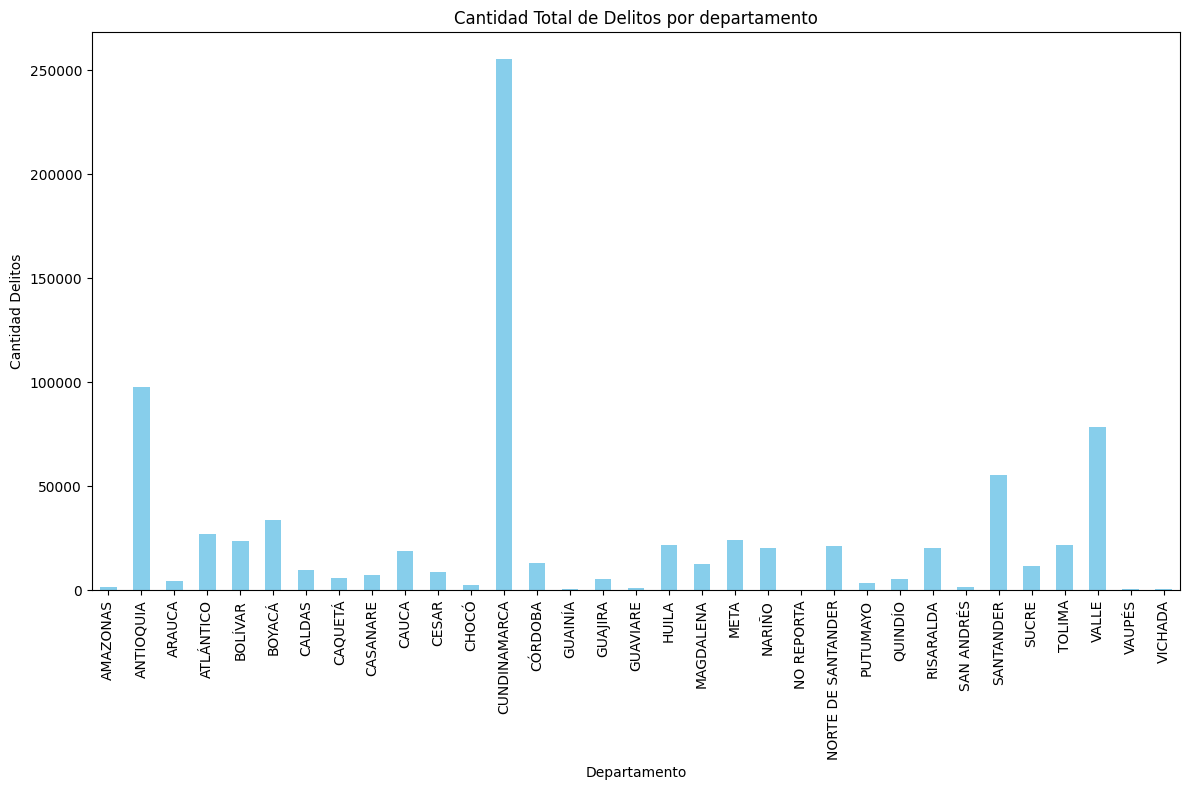

In [49]:
plt.figure(figsize=(12, 8))
departament_counts.plot(kind='bar', color='skyblue')
plt.title('Cantidad Total de Delitos por departamento')
plt.xlabel('Departamento')
plt.ylabel('Cantidad Delitos')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Grafico de barras de media geometrica respecto a cada departamento 

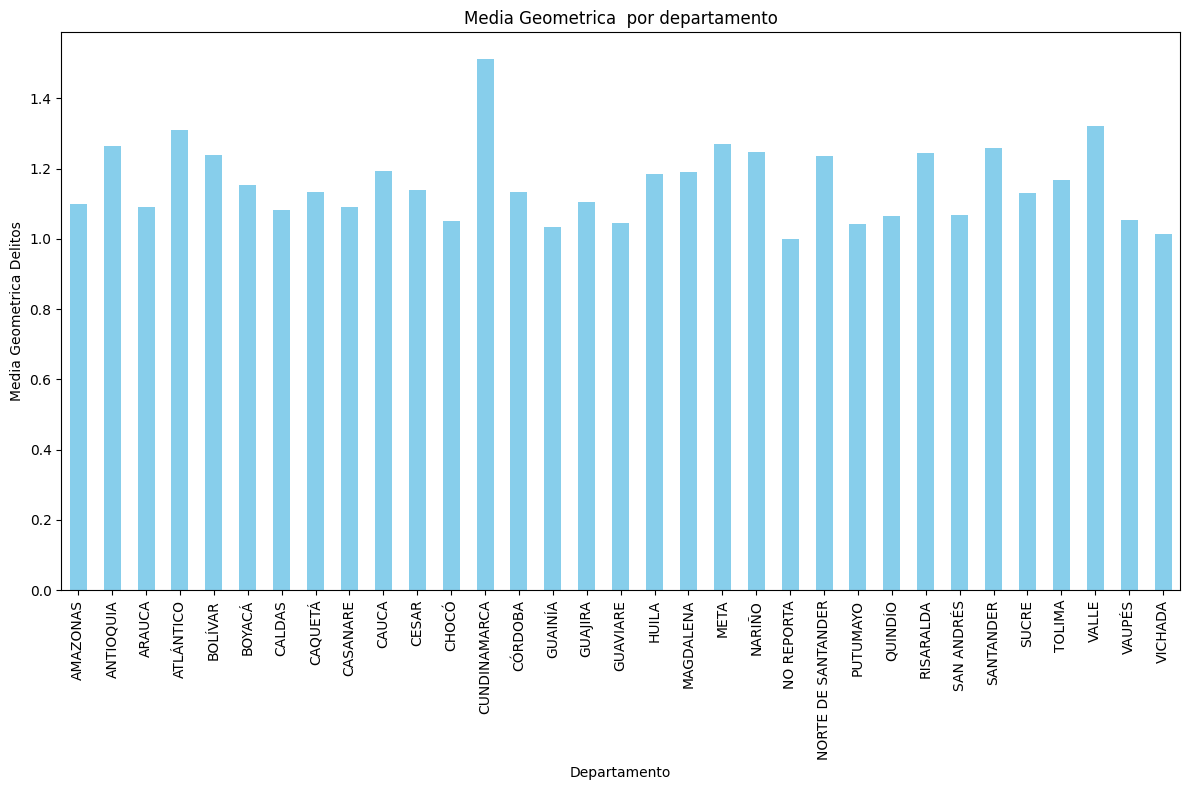

In [20]:
plt.figure(figsize=(12, 8))
departament_MediaGeometrica.plot(kind='bar', color='skyblue')
plt.title('Media Geometrica  por departamento')
plt.xlabel('Departamento')
plt.ylabel('Media Geometrica Delitos')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Grafico de barras sobre que tipo de arma es más utilizada en cada grupo etario

In [50]:
import seaborn as sns
grupo_eNTIDADtario_data = df_cleaned.groupby(['GRUPO ETARIO', 'ARMAS MEDIOS'])['CANTIDAD'].sum().reset_index()

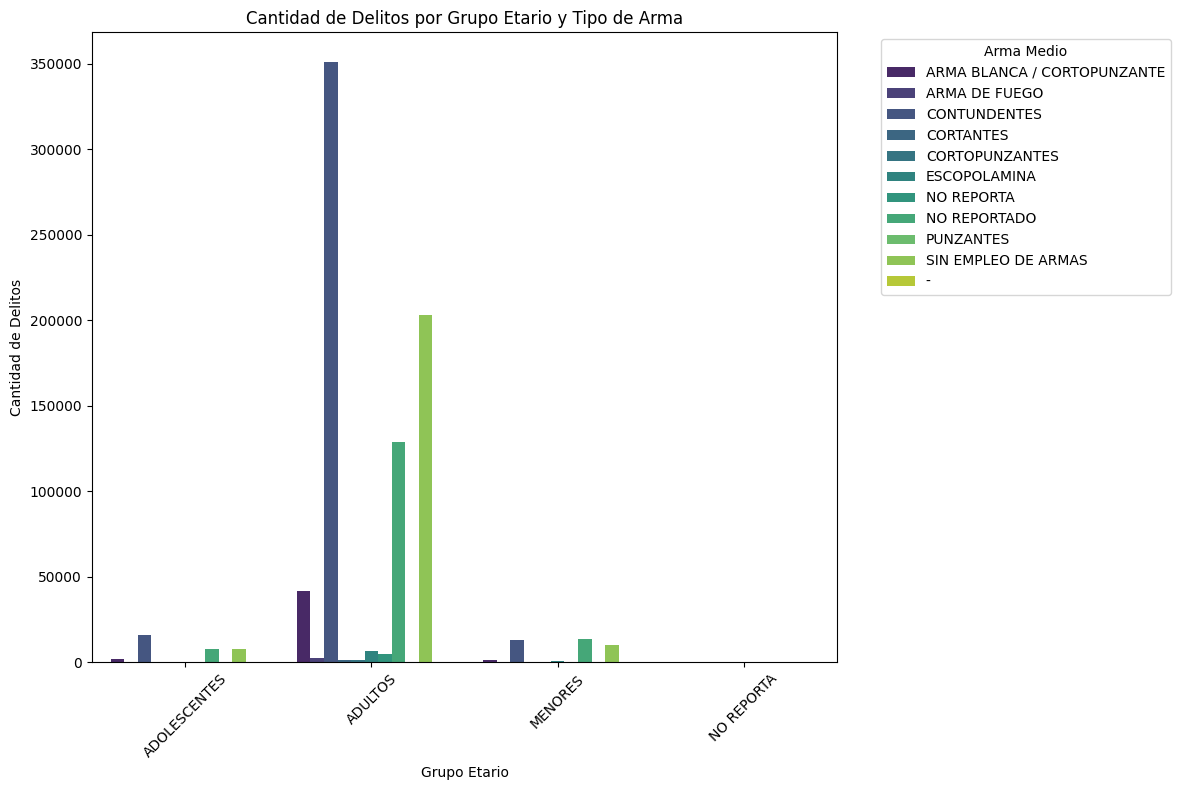

In [51]:
plt.figure(figsize=(12, 8))
sns.barplot(data=grupo_eNTIDADtario_data, x='GRUPO ETARIO', y='CANTIDAD', hue='ARMAS MEDIOS', palette='viridis')
plt.title('Cantidad de Delitos por Grupo Etario y Tipo de Arma')
plt.xlabel('Grupo Etario')
plt.ylabel('Cantidad de Delitos')
plt.xticks(rotation=45)  
plt.legend(title='Arma Medio', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  
plt.show()

Grafico muestra el porcentaje de delitos cometidos por cada género

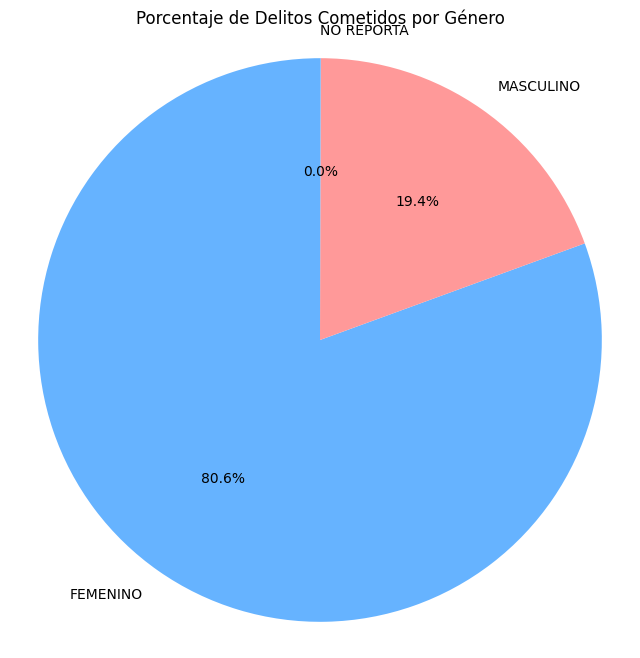

In [52]:
delitos_por_genero = df_cleaned.groupby('GENERO')['CANTIDAD'].sum()

porcentaje_genero = (delitos_por_genero / delitos_por_genero.sum()) * 100

plt.figure(figsize=(8, 8))
plt.pie(porcentaje_genero, labels=porcentaje_genero.index, autopct='%1.1f%%', colors=['#66b3ff','#ff9999'], startangle=90)
plt.title('Porcentaje de Delitos Cometidos por Género')
plt.axis('equal')  
plt.show()

Grafico muestra en que meses se han cometido más delitos a lo largo de cada año

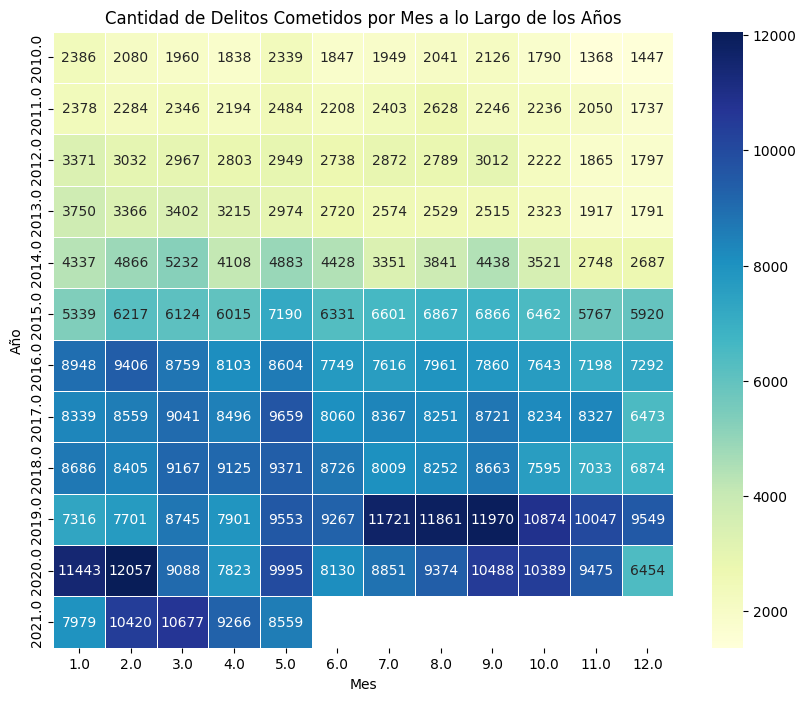

In [55]:
delitos_por_mes_año = df.groupby(['AÑO', 'MES'])['CANTIDAD'].sum().unstack()

plt.figure(figsize=(10, 8))

sns.heatmap(delitos_por_mes_año, cmap='YlGnBu', annot=True, fmt=".0f", linewidths=.5)

plt.title('Cantidad de Delitos Cometidos por Mes a lo Largo de los Años')
plt.xlabel('Mes')
plt.ylabel('Año')

plt.show()